In [16]:
import numpy as np
import matplotlib.pyplot as plt

# TP: positivos (1s) clasificados como positivos (1s)
def calcular_TP(y_true,y_pred):
    multip = y_true*y_pred
    return np.sum(multip) # Sólo los positivos (1s) en ambos arreglos se sumarán

# TN: negativos (0s) clasificados como negativos (0s)
def calcular_TN(y_true,y_pred):
    # Multiplicar los arreglos invertidos(1->0, 0->1) pues en este caso nos
    # interesan los 0s
    multip = (1-y_true)*(1-y_pred)
    return np.sum(multip) # Sólo los negativos (0s) en ambos arreglos se sumarán

# FN: positivos (1s) clasificados como negativos (0s)
def calcular_FN(y_true,y_pred):
    # Los FN son simplemente todos los positivos - TP
    positivos = np.sum(y_true)      # Todos los positivos
    tp = calcular_TP(y_true,y_pred) # Verdaderos positivos
    return positivos - tp           # Falsos negativos

# FP: negativos (0s) clasificados como positivos (1s)
def calcular_FP(y_true,y_pred):
    # Los FP son simplemente todos los negativos - TN
    negativos = np.sum(1-y_true)    # Todos los negativos
    tn = calcular_TN(y_true,y_pred) # Verdaderos negativos
    return negativos - tn           # Falsos positivos

# FPR = FP/(FP+TN)
def calcular_FPR(y_true,y_pred):
    fp = calcular_FP(y_true,y_pred)
    tn = calcular_TN(y_true,y_pred)
    return fp/(fp+tn)

# TPR = TP/(TP+FN)
def calcular_TPR(y_true,y_pred):
    tp = calcular_TP(y_true,y_pred)
    fn = calcular_FN(y_true,y_pred)
    return tp/(tp+fn)


In [17]:
# Datos + (1) y -(0)
y_true = np.array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1])

# Los puntos de corte ti se traducen en clasificaciones predichas para cada caso
# Basado en la explicación, cada ti efectivamente divide los datos en dos grupos:
# a la izquierda (0) y a la derecha (1) de ti
tis = [
    np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),  # t7  # TP=0, TN=8, FN=8, FP=0
    np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]),  # t6  # TP=1, TN=8, FN=7, FP=0
    np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]),  # t5
    np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]),  # t4
    np.array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]),  # t3
    np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),  # t2
    np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),  # t1
]

# Cálculo de TPR y FPR para cada ti
resultados = []
print("Ti\tTP\tFP\tTN\tFN\t\tTPR\t\tFPR")

for i, y_pred in enumerate(tis, start=1):
    tp = calcular_TP(y_true, y_pred)
    fp = calcular_FP(y_true, y_pred)
    tn = calcular_TN(y_true, y_pred)
    fn = calcular_FN(y_true, y_pred)
    fpr = calcular_FPR(y_true, y_pred)
    tpr = calcular_TPR(y_true, y_pred)
    resultados.append((fpr, tpr))
    
    # Imprimir resultados en formato de tabla
    print(f"t{i}\t{tp}\t{fp}\t{tn}\t{fn}\t\t{tpr:.2f}\t\t{fpr:.2f}")

# Determinar el mejor punto de corte como aquel más cercano a (0,1)
# Esto puede hacerse calculando la distancia al punto óptimo (0,1) y eligiendo el mínimo
distancias = [np.sqrt((0-fpr)**2 + (1-tpr)**2) for fpr, tpr in resultados]
mejor_ti_index = np.argmin(distancias)
print(f"\nEl mejor punto de corte es t_{mejor_ti_index+1} con FPR = {resultados[mejor_ti_index][0]:.2f} y TPR = {resultados[mejor_ti_index][1]:.2f}.")


Ti	TP	FP	TN	FN		TPR		FPR
t1	0	0	8	8		0.00		0.00
t2	1	0	8	7		0.12		0.00
t3	4	0	8	4		0.50		0.00
t4	5	2	6	3		0.62		0.25
t5	6	3	5	2		0.75		0.38
t6	8	4	4	0		1.00		0.50
t7	8	8	0	0		1.00		1.00

El mejor punto de corte es t_4 con FPR = 0.25 y TPR = 0.62.


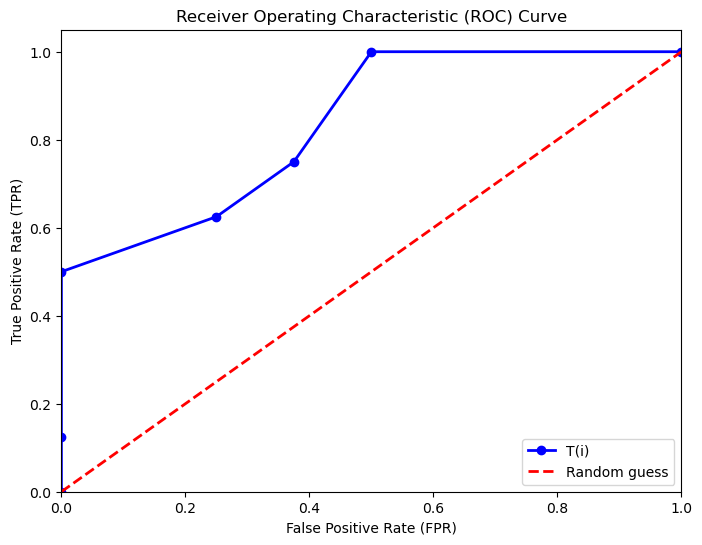

In [22]:
fprs, tprs = zip(*resultados) #desempaqueta mis tuplas en la lista de resultados

plt.figure(figsize=(8, 6))
plt.plot(fprs, tprs, color='blue', lw=2, marker='o', label='T(i)') 
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random guess')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")


plt.show()